### Question 1

In [6]:
# Read the text in Data_1 as a string
with open('Part A Text Data/Data_1.txt', 'r') as file: 
    data = file.read()
print(data)

Textual information in the world can be broadly categorized into two main types: facts and opinions. Facts are objective expressions about entities, events, and their properties. Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties.


Tokenization

In [2]:
# Using NLTK packages
from nltk.tokenize import word_tokenize
nltk_tokens = word_tokenize(data)
print("Using NLTK: ", len(nltk_tokens), "tokens")
print(nltk_tokens)

# Using split function
split_tokens = data.split()  # By default, split string into a list of words by whitespace
print("\nUsing Split Function: ", len(split_tokens), "tokens")
print(split_tokens)

# Using regular expression 
import re
regex_tokens = re.findall(r'\b\w+\b', data)
print("\nUsing Regular Expression: ", len(regex_tokens), "tokens")
print(regex_tokens)

Using NLTK:  56 tokens
['Textual', 'information', 'in', 'the', 'world', 'can', 'be', 'broadly', 'categorized', 'into', 'two', 'main', 'types', ':', 'facts', 'and', 'opinions', '.', 'Facts', 'are', 'objective', 'expressions', 'about', 'entities', ',', 'events', ',', 'and', 'their', 'properties', '.', 'Opinions', 'are', 'usually', 'subjective', 'expressions', 'that', 'describe', 'people', '’', 's', 'sentiments', ',', 'appraisals', ',', 'or', 'feelings', 'toward', 'entities', ',', 'events', ',', 'and', 'their', 'properties', '.']

Using Split Function:  44 tokens
['Textual', 'information', 'in', 'the', 'world', 'can', 'be', 'broadly', 'categorized', 'into', 'two', 'main', 'types:', 'facts', 'and', 'opinions.', 'Facts', 'are', 'objective', 'expressions', 'about', 'entities,', 'events,', 'and', 'their', 'properties.', 'Opinions', 'are', 'usually', 'subjective', 'expressions', 'that', 'describe', 'people’s', 'sentiments,', 'appraisals,', 'or', 'feelings', 'toward', 'entities,', 'events,', 'a

Stop Words and Punctuation Filtering

In [7]:
import nltk, string
nltk.download('punkt')
nltk.download('stopwords')

content_lower_case = data.lower()  # Convert all words to lower case before removing stopwords and punctuation
tokens = nltk.tokenize.word_tokenize(content_lower_case)

stop_tokens = nltk.corpus.stopwords.words("english") + list(string.punctuation)
filtered_tokens = []
stop_words = []

for word in tokens:
    if  word in stop_tokens:
        stop_words.append(word)
    elif len(word) > 1:
        filtered_tokens.append(word)

print("After removing stop words and punctuation: ",len(filtered_tokens)," tokens")
print(filtered_tokens,"\n")
print(len(stop_words)," stop words found:")
print(stop_words)

After removing stop words and punctuation:  29  tokens
['textual', 'information', 'world', 'broadly', 'categorized', 'two', 'main', 'types', 'facts', 'opinions', 'facts', 'objective', 'expressions', 'entities', 'events', 'properties', 'opinions', 'usually', 'subjective', 'expressions', 'describe', 'people', 'sentiments', 'appraisals', 'feelings', 'toward', 'entities', 'events', 'properties'] 

26  stop words found:
['in', 'the', 'can', 'be', 'into', ':', 'and', '.', 'are', 'about', ',', ',', 'and', 'their', '.', 'are', 'that', 's', ',', ',', 'or', ',', ',', 'and', 'their', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Question 2

### Question 3

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Wei Tian
[nltk_data]     Wong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Wei Tian
[nltk_data]     Wong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Wei Tian Wong\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

NLTK POS Tagger

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

# Input text
txt = "The big black dog barked at the white cat and chased away."

# tokenized the sentences
tokenized = sent_tokenize(txt)
for i in tokenized:

	# tokenized each word
	wordsList = nltk.word_tokenize(i)

	# removing stop words
	wordsList = [w for w in wordsList if not w in stop_words]

	# perform tagging
	tagged = nltk.pos_tag(wordsList)
	print(tagged)

[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('white', 'JJ'), ('cat', 'NN'), ('chased', 'VBD'), ('away', 'RB'), ('.', '.')]


TextBlob POS Tagger

In [4]:
from textblob import TextBlob

text = ("The big black dog barked at the white cat and chased away.")

# create textblob object
blob_object = TextBlob(text)

# perform tagging and print out the result
print(blob_object.tags)

[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB')]


Regular Expression Tagger

In [5]:
# RE pattern
patterns = [
     (r'([Tt]he|[Aa]|[Aa]n)$', 'DT'),  # basic determiner
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN'),                    # nouns (default)
     (r'^\d+$', 'CD'),
     (r'.*ing$', 'VBG'),               # gerunds, i.e. wondering
     (r'.*ment$', 'NN'),               # i.e. wonderment
     (r'.*ful$', 'JJ')                 # i.e. wonderful
 ]

# Fitting the patterns into RegexpTagger
tagger = nltk.tag.sequential.RegexpTagger(patterns)

# tokenized the sentence
text = word_tokenize('The big black dog barked at the white cat and chased away.')

# perform tagging and print out the result
print(tagger.tag(text))

[('The', 'DT'), ('big', 'NN'), ('black', 'NN'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'NN'), ('the', 'DT'), ('white', 'NN'), ('cat', 'NN'), ('and', 'NN'), ('chased', 'VBD'), ('away', 'NN'), ('.', 'NN')]


Parse Tree

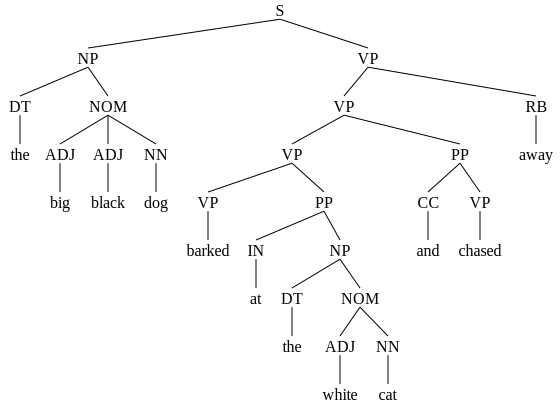

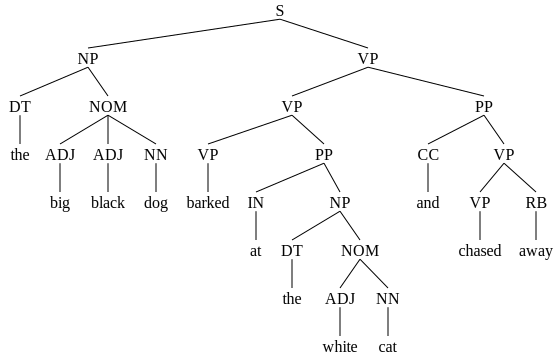

In [8]:
# Define CFG
grammer = nltk.CFG.fromstring("""
S -> NP VP
VP -> VP PP | VP RB
NP -> DT NOM
PP -> IN NP | CC VP
NOM -> ADJ NN | ADJ ADJ NN
DT -> 'the'
ADJ -> 'big' | 'black' | 'white'
NN -> 'dog' | 'cat'
VP -> 'barked' | 'chased'
IN -> 'at'
CC -> 'and'
RB -> 'away'
""")

# Input and tokenize the text
tokenized_words = nltk.tokenize.word_tokenize("the big black dog barked at the white cat and chased away")

# Create a chart parser based on the CFG
parser = nltk.ChartParser(grammer)

# Parse and display the tree
for tree in parser.parse(tokenized_words):
  display(tree)

### Question 4